In [249]:
import os

import pandas as pd
import numpy as np


%run us_common_functions.ipynb



combine_studies = True


In [250]:
single_sec_df = pd.read_csv(all_studies_data_dir + 'data_2.5.csv')
window_sec_df = pd.read_csv(all_studies_data_dir + 'data_3.csv')

# single_sec_df = pd.read_csv(all_studies_data_dir + 'data_2.5.csv').iloc[:2000,]
# window_sec_df = pd.read_csv(all_studies_data_dir + 'data_3.csv').iloc[:2000,]

single_sec_df.head(5)
window_sec_df.head(5)

,Subject,Age,NASA_Effort,NASA_Frustration,NASA_Mental,NASA_Performance,NASA_Physical,NASA_Temporal,NASA_Total,Treatment,Gender,Gender_Male,PP_Mean,PP_Median,PP_SD,PP_SS,HR_Mean,HR_Median,HR_SD,HR_SS,BR_Mean,BR_Median,BR_SD,BR_SS,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,Study_Name,Study_Subject
0,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,neutral,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
1,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
2,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
3,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,non-arousal,neutral,non-arousal,non-arousal,non-arousal,neutral,non-arousal,sim1,sim1_2
4,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,non-arousal,neutral,neutral,neutral,non-arousal,neutral,neutral,sim1,sim1_2


In [251]:
single_sec_df.columns

Index(['Subject', 'Age', 'NASA_Effort', 'NASA_Frustration', 'NASA_Mental',
       'NASA_Performance', 'NASA_Physical', 'NASA_Temporal', 'NASA_Total',
       'TimeElapsed', 'Treatment', 'Gender', 'Perinasal', 'Perinasal_Log',
       'Heart', 'Breathing', 'PP_Normalized', 'HR_Normalized', 'BR_Normalized',
       'PP_Arousal', 'HR_Arousal', 'BR_Arousal', 'PP_ecdf', 'HR_ecdf',
       'BR_ecdf', 'PP_HR_ecdf', 'PP_BR_ecdf', 'HR_BR_ecdf', 'PP_HR_BR_ecdf',
       'PP_Arousal_ecdf', 'HR_Arousal_ecdf', 'BR_Arousal_ecdf',
       'PP_HR_Arousal_ecdf', 'PP_BR_Arousal_ecdf', 'HR_BR_Arousal_ecdf',
       'PP_HR_BR_Arousal_ecdf', 'Study_Name', 'Study_Subject'],
      dtype='object')

In [252]:
single_sec_df.Study_Name.unique()

array(['sim1', 'sim2', 'tt1', 'office_tasks', 'deadline_study'],
      dtype=object)

In [253]:
study_ecdf_combinations

{'sim1___sim2': ['sim1', 'sim2'],
 'sim1___sim2___tt1': ['sim1', 'sim2', 'tt1'],
 'sim1___sim2___office_tasks': ['sim1', 'sim2', 'office_tasks'],
 'sim1___sim2___tt1___office_tasks': ['sim1', 'sim2', 'tt1', 'office_tasks']}

In [254]:
study_combined_feaures = ['Subject',
                          'Study_Name',
                          'Study_Subject',
                          'Treatment', 
                          'TimeElapsed',

                          'Gender', 
                          'Age',

                          'NASA_Effort',
                          'NASA_Frustration', 
                          'NASA_Mental', 
                          'NASA_Performance', 
                          'NASA_Physical',
                          'NASA_Temporal', 
                          'NASA_Total', 

                          'Perinasal_Log', 
                          'Heart', 
                          'Breathing',

                          'PP_Normalized', 
                          'HR_Normalized', 
                          'BR_Normalized',

                          'PP_Arousal', 
                          'HR_Arousal',
                          'BR_Arousal'
                         ]



sim1___sim2

Subject Processing: 
sim1_2
sim1_3
sim1_5
sim1_8
sim1_14
sim1_16
sim1_17
sim1_18
sim1_20
sim1_23
sim1_24
sim1_25
sim1_29
sim1_31
sim1_33
sim1_36
sim1_38
sim1_39
sim1_43
sim1_44
sim1_45
sim1_47
sim1_60
sim1_61
sim1_62
sim1_66
sim1_77
sim1_79
sim1_80
sim1_81
sim1_84
sim2_23
sim2_24
sim2_25
sim2_26
sim2_27
sim2_37
sim2_38
sim2_39
sim2_40
sim2_43
sim2_45
sim2_46
sim2_47
sim2_48
sim2_49
sim2_52
sim2_53
sim2_54
sim2_56
sim2_64
sim2_65
                 PP_Arousal_Mode
PP_Arousal_Mode                 
arousal                    33.88
neutral                    33.79
non-arousal                32.33 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
arousal                    34.62
neutral                    33.62
non-arousal                31.76 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
arousal                    33.43
neutral                    34.12
non-arousal                32.45 

                    PP_HR_Arousal_Mode
PP_HR_Arousa

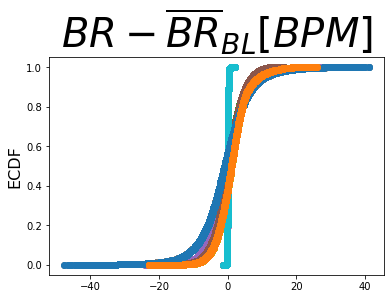

In [255]:
if combine_studies:
    start_time = time.time()

    for study_comb in list(study_ecdf_combinations.keys()):
    # for study_comb in list(study_ecdf_combinations.keys())[1:2]:

        studies = study_ecdf_combinations[study_comb]
        study_name_combined = '___'.join(studies)
        print('\n\n%s\n' % study_name_combined)

        study_comb_signals = ['PP', 'HR', 'BR']
        study_combined_df = single_sec_df.copy()[single_sec_df.Study_Name.isin(studies)]
        study_combined_df = study_combined_df.loc[:, study_combined_feaures]
        # study_combined_df = study_combined_df.loc[:1000, study_combined_feaures]


        for i, label in enumerate(('A', 'B', 'C')):
            study_combined_df = generate_ecdf_plots(study_combined_df, i)

        study_combined_df['Subject'] = study_combined_df['Study_Subject']
        study_combined_df['Study_Name'] = study_name_combined
        study_combined_df['Study_Subject'] = study_combined_df['Study_Name'] + '_____' + study_combined_df['Subject']
        study_combined_df = generate_ecdf_arousal_cols(study_combined_df, study_comb_signals)
        single_sec_df = pd.concat([single_sec_df, study_combined_df])

        aggr_df = get_non_overlapping_aggregrated_df(study_combined_df)
        aggr_df['Study_Name'] = study_name_combined
        aggr_df = get_study_subject_name(aggr_df)
        aggr_df = rename_cols(aggr_df)
        window_sec_df = pd.concat([window_sec_df, aggr_df])


    window_sec_df = finalize_model_data(window_sec_df)
    
    single_sec_df.to_csv(all_studies_data_dir + 'data_2_5_study_combined.csv') 
    window_sec_df.to_csv(all_studies_data_dir + 'data_3_study_combined.csv') # Need to clean the deadline study data
    # data_3_study_combined____v0_delete_it
    
    get_scaled_df(files=['data_3_study_combined.csv'])
    
    total_time = time.time() - start_time
    print("--- Total time for combining studies %s mins (%s hours) ---" % (total_time//60, total_time//3600))
    #############################################################################################

In [256]:
if not combine_studies:
    window_sec_df = pd.read_csv(all_studies_data_dir + 'data_3_study_combined.csv')
    # data_3_study_combined____v0_delete_it

window_sec_df.shape

(105514, 33)

In [257]:
window_sec_df.columns

Index(['Subject', 'Age', 'NASA_Effort', 'NASA_Frustration', 'NASA_Mental',
       'NASA_Performance', 'NASA_Physical', 'NASA_Temporal', 'NASA_Total',
       'Treatment', 'Gender', 'Gender_Male', 'PP_Mean', 'PP_Median', 'PP_SD',
       'PP_SS', 'HR_Mean', 'HR_Median', 'HR_SD', 'HR_SS', 'BR_Mean',
       'BR_Median', 'BR_SD', 'BR_SS', 'PP_Arousal_Mode', 'HR_Arousal_Mode',
       'BR_Arousal_Mode', 'PP_HR_Arousal_Mode', 'PP_BR_Arousal_Mode',
       'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode', 'Study_Name',
       'Study_Subject'],
      dtype='object')

In [258]:
get_data_description(window_sec_df)

Age
18.0 85.0


NASA_Effort
0.0 20.0


NASA_Frustration
0.0 20.0


NASA_Mental
1.0 20.0


NASA_Performance
1.0 20.0


NASA_Physical
0.0 20.0


NASA_Temporal
0.0 20.0


NASA_Total
15.0 120.0


Gender_Male
0 1


PP_Mean
-3.0408892283826487 1.8206175180351267


PP_Median
-3.038478517857187 1.9583191211181492


PP_SD
1.1225726153825563e-05 0.9265366361011708


PP_SS
6.115258415759059e-07 92.48611158418537


HR_Mean
-43.80317460317461 36.051898734177215


HR_Median
-45.10317460317461 36.65189873417721


HR_SD
0.0 17.081889955477035


HR_SS
0.0001804056898392 19278.781053162013


BR_Mean
-22.761778491171736 24.71860655737705


BR_Median
-22.765778491171737 24.958606557377053


BR_SD
0.0 3.795962767643188


BR_SS
0.0040403020125752 6115.839101384038


Study_Subject
deadline_study_11 tt1_9


Study_Name
['sim1' 'sim2' 'tt1' 'office_tasks' 'deadline_study' 'sim1___sim2'
 'sim1___sim2___tt1' 'sim1___sim2___office_tasks'
 'sim1___sim2___tt1___office_tasks']


Subject
[2 3 5 8 14 16 17 18 20 23 24 

In [274]:
# nasa_cols = ['NASA_Physical', 'NASA_Effort', 'NASA_Frustration', 'NASA_Temporal', 'NASA_Performance', 'NASA_Mental', 'NASA_Total']
# for study in window_sec_df.Study_Name.unique():
#     print(study)
#     for nasa_col in nasa_cols:
#         print(nasa_col)
#         print(window_sec_df[nasa_col].min(), window_sec_df[nasa_col].max())

In [259]:
window_sec_df = window_sec_df[[
                               'Study_Name', 
                               'Subject', 
                               'Treatment',

                               'Age', 
                               'Gender', 

                               'NASA_Physical',
                               'NASA_Effort', 
                               'NASA_Frustration',
                               'NASA_Temporal',
                               'NASA_Performance',
                               'NASA_Mental',
                               'NASA_Total',

                               'PP_Mean',
                               'PP_Median', 
                               'PP_SD', 
                               'PP_SS',

                               'HR_Mean', 
                               'HR_Median', 
                               'HR_SD', 
                               'HR_SS', 

                               'BR_Mean',
                               'BR_Median', 
                               'BR_SD', 
                               'BR_SS',

                               'PP_Arousal_Mode', 
                               'HR_Arousal_Mode', 
                               'BR_Arousal_Mode',
                               'PP_HR_Arousal_Mode', 
                               'PP_BR_Arousal_Mode', 
                               'HR_BR_Arousal_Mode',
                               'PP_HR_BR_Arousal_Mode'
                              ]]

window_sec_df.columns

Index(['Study_Name', 'Subject', 'Treatment', 'Age', 'Gender', 'NASA_Physical',
       'NASA_Effort', 'NASA_Frustration', 'NASA_Temporal', 'NASA_Performance',
       'NASA_Mental', 'NASA_Total', 'PP_Mean', 'PP_Median', 'PP_SD', 'PP_SS',
       'HR_Mean', 'HR_Median', 'HR_SD', 'HR_SS', 'BR_Mean', 'BR_Median',
       'BR_SD', 'BR_SS', 'PP_Arousal_Mode', 'HR_Arousal_Mode',
       'BR_Arousal_Mode', 'PP_HR_Arousal_Mode', 'PP_BR_Arousal_Mode',
       'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode'],
      dtype='object')

In [260]:
window_sec_df.head()

,Study_Name,Subject,Treatment,Age,Gender,NASA_Physical,NASA_Effort,NASA_Frustration,NASA_Temporal,NASA_Performance,NASA_Mental,NASA_Total,PP_Mean,PP_Median,PP_SD,PP_SS,HR_Mean,HR_Median,HR_SD,HR_SS,BR_Mean,BR_Median,BR_SD,BR_SS,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode
0,sim1,2,CD,23.0,1,12.0,17.0,11.0,11.0,8.0,18.0,77.0,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,neutral,arousal,non-arousal,neutral,non-arousal,neutral,neutral
1,sim1,2,CD,23.0,1,12.0,17.0,11.0,11.0,8.0,18.0,77.0,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral
2,sim1,2,CD,23.0,1,12.0,17.0,11.0,11.0,8.0,18.0,77.0,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral
3,sim1,2,CD,23.0,1,12.0,17.0,11.0,11.0,8.0,18.0,77.0,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,non-arousal,neutral,non-arousal,non-arousal,non-arousal,neutral,non-arousal
4,sim1,2,CD,23.0,1,12.0,17.0,11.0,11.0,8.0,18.0,77.0,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,non-arousal,neutral,neutral,neutral,non-arousal,neutral,neutral


In [261]:
window_sec_df[window_sec_df.Study_Name=='deadline_study']

,Study_Name,Subject,Treatment,Age,Gender,NASA_Physical,NASA_Effort,NASA_Frustration,NASA_Temporal,NASA_Performance,NASA_Mental,NASA_Total,PP_Mean,PP_Median,PP_SD,PP_SS,HR_Mean,HR_Median,HR_SD,HR_SS,BR_Mean,BR_Median,BR_SD,BR_SS,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode
22112,deadline_study,5,Day1_WS,35.0,0,5.0,15.0,5.0,12.0,12.0,14.0,63.0,0.346319,0.361038,0.055406,1.227000,-16.791476,-16.791476,0.001579,2819.536619,NaN,NaN,NaN,NaN,arousal,non-arousal,NaN,neutral,NaN,NaN,NaN
22113,deadline_study,5,Day1_WS,35.0,0,5.0,15.0,5.0,12.0,12.0,14.0,63.0,0.261452,0.268220,0.017390,0.686292,-16.796690,-16.796690,0.001579,2821.287858,NaN,NaN,NaN,NaN,arousal,non-arousal,NaN,neutral,NaN,NaN,NaN
22114,deadline_study,5,Day1_WS,35.0,0,5.0,15.0,5.0,12.0,12.0,14.0,63.0,0.265244,0.265203,0.012130,0.704866,-16.801904,-16.801904,0.001579,2823.039641,NaN,NaN,NaN,NaN,neutral,non-arousal,NaN,neutral,NaN,NaN,NaN
22115,deadline_study,5,Day1_WS,35.0,0,5.0,15.0,5.0,12.0,12.0,14.0,63.0,0.301367,0.306739,0.019182,0.911534,-16.807117,-16.807117,0.001579,2824.791967,NaN,NaN,NaN,NaN,arousal,non-arousal,NaN,neutral,NaN,NaN,NaN
22116,deadline_study,5,Day1_WS,35.0,0,5.0,15.0,5.0,12.0,12.0,14.0,63.0,0.304664,0.296093,0.026836,0.934685,-16.812331,-16.812331,0.001579,2826.544836,NaN,NaN,NaN,NaN,arousal,non-arousal,NaN,neutral,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44463,deadline_study,19,Day4_WS,52.0,0,10.0,5.0,2.0,10.0,18.0,12.0,57.0,1.318438,1.317482,0.036174,17.394558,6.267880,6.276633,0.047177,392.883287,NaN,NaN,NaN,NaN,arousal,arousal,NaN,arousal,NaN,NaN,NaN
44464,deadline_study,19,Day4_WS,52.0,0,10.0,5.0,2.0,10.0,18.0,12.0,57.0,1.411800,1.414793,0.012815,19.933259,6.424375,6.424381,0.070708,412.770971,NaN,NaN,NaN,NaN,arousal,arousal,NaN,arousal,NaN,NaN,NaN
44465,deadline_study,19,Day4_WS,52.0,0,10.0,5.0,2.0,10.0,18.0,12.0,57.0,1.414191,1.415924,0.010219,20.000306,6.597395,6.607945,0.056934,435.285430,NaN,NaN,NaN,NaN,arousal,arousal,NaN,arousal,NaN,NaN,NaN
44466,deadline_study,19,Day4_WS,52.0,0,10.0,5.0,2.0,10.0,18.0,12.0,57.0,1.340806,1.344635,0.036325,17.989481,6.715069,6.714971,0.022976,450.926322,NaN,NaN,NaN,NaN,arousal,arousal,NaN,arousal,NaN,NaN,NaN


In [262]:
window_sec_df[window_sec_df.Study_Name=='deadline_study'][['Study_Name', 'Treatment']+br_cols]

,Study_Name,Treatment,BR_Mean,BR_Median,BR_SD,BR_SS,BR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode
22112,deadline_study,Day1_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22113,deadline_study,Day1_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22114,deadline_study,Day1_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22115,deadline_study,Day1_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22116,deadline_study,Day1_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44463,deadline_study,Day4_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44464,deadline_study,Day4_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44465,deadline_study,Day4_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44466,deadline_study,Day4_WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
window_sec_df[window_sec_df.Study_Name!='deadline_study'][['Study_Name', 'Treatment']+br_cols]

,Study_Name,Treatment,BR_Mean,BR_Median,BR_SD,BR_SS,BR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode
0,sim1,CD,-5.414682,-5.416682,0.162809,293.426352,non-arousal,non-arousal,neutral,neutral
1,sim1,CD,-4.462682,-4.366682,0.352742,200.275130,non-arousal,non-arousal,neutral,neutral
2,sim1,CD,-3.358682,-3.366682,0.355928,113.947596,non-arousal,non-arousal,neutral,neutral
3,sim1,CD,-2.302682,-2.386682,0.319138,53.940076,non-arousal,non-arousal,neutral,non-arousal
4,sim1,CD,-0.978682,-0.916682,0.339830,10.617541,neutral,non-arousal,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...
0,sim1___sim2___tt1___office_tasks,DT,-2.979899,-2.979899,0.000000,88.798010,non-arousal,neutral,non-arousal,non-arousal
0,sim1___sim2___tt1___office_tasks,DT,-2.279899,-1.979899,0.483046,54.079417,non-arousal,neutral,non-arousal,non-arousal
0,sim1___sim2___tt1___office_tasks,DT,-1.979899,-1.979899,0.000000,39.200020,non-arousal,neutral,non-arousal,non-arousal
0,sim1___sim2___tt1___office_tasks,DT,-2.279899,-1.979899,0.483046,54.079417,non-arousal,neutral,non-arousal,non-arousal


----
----
# Do all data cleaning before exporting and scaling data_3_study_combined.csv
# Only column selection and renaming for the OSF. Nothing else!!!
----
----


----
----
### Checking - Done
1. Check unique values for each categorical columns
2. Check range for each numeric columns
----
----


----
----
### Deadline Checking - Done 
1. Replace all BR Realted features NA
2. Remove the Treatments other than Corresponding_Day_RB
3. Replace the Treatments as Day1_WS, Day1_WS etc.
----
----

In [264]:
# window_sec_df[window_sec_df.Study_Name=='deadline_study']

In [265]:
# window_sec_df = window_sec_df[window_sec_df.Study_Name!='deadline_study']
# window_sec_df[window_sec_df.Study_Name=='deadline_study']

In [266]:
# window_sec_df.to_csv(all_studies_data_dir + 'data_3_study_combined.csv') 
# get_scaled_df(files=['data_3_study_combined.csv'])

----
# From here...Only column selection & renaming
----

In [267]:
classification_df = pd.read_csv(all_studies_data_dir + 'data_3_study_combined.csv')
classification_df

,Unnamed: 0,Subject,Age,NASA_Effort,NASA_Frustration,NASA_Mental,NASA_Performance,NASA_Physical,NASA_Temporal,NASA_Total,Treatment,Gender,Gender_Male,PP_Mean,PP_Median,PP_SD,PP_SS,HR_Mean,HR_Median,HR_SD,HR_SS,BR_Mean,BR_Median,BR_SD,BR_SS,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,Study_Name,Study_Subject
0,0,2,23.0,17.000000,11.000000,18.000000,8.000000,12.000000,11.000000,77.000000,CD,1,0,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,neutral,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
1,1,2,23.0,17.000000,11.000000,18.000000,8.000000,12.000000,11.000000,77.000000,CD,1,0,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
2,2,2,23.0,17.000000,11.000000,18.000000,8.000000,12.000000,11.000000,77.000000,CD,1,0,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
3,3,2,23.0,17.000000,11.000000,18.000000,8.000000,12.000000,11.000000,77.000000,CD,1,0,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,non-arousal,neutral,non-arousal,non-arousal,non-arousal,neutral,non-arousal,sim1,sim1_2
4,4,2,23.0,17.000000,11.000000,18.000000,8.000000,12.000000,11.000000,77.000000,CD,1,0,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,non-arousal,neutral,neutral,neutral,non-arousal,neutral,neutral,sim1,sim1_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105509,0,office_tasks_175,18.0,5.714286,14.285714,2.857143,14.285714,2.857143,2.857143,42.857143,DT,1,0,0.139689,0.140393,0.001898,0.195163,-15.645729,-16.145729,2.877113,2522.388248,-2.979899,-2.979899,0.000000,88.798010,neutral,non-arousal,non-arousal,non-arousal,neutral,non-arousal,non-arousal,sim1___sim2___tt1___office_tasks,sim1___sim2___tt1___office_tasks_office_tasks_175
105510,0,office_tasks_175,18.0,5.714286,14.285714,2.857143,14.285714,2.857143,2.857143,42.857143,DT,1,0,0.141316,0.140855,0.001315,0.199718,-7.745729,-7.645729,4.647580,794.363122,-2.279899,-1.979899,0.483046,54.079417,neutral,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,sim1___sim2___tt1___office_tasks,sim1___sim2___tt1___office_tasks_office_tasks_175
105511,0,office_tasks_175,18.0,5.714286,14.285714,2.857143,14.285714,2.857143,2.857143,42.857143,DT,1,0,0.157549,0.157013,0.008391,0.248852,-15.445729,-15.145729,1.828782,2415.805333,-1.979899,-1.979899,0.000000,39.200020,neutral,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,sim1___sim2___tt1___office_tasks,sim1___sim2___tt1___office_tasks_office_tasks_175
105512,0,office_tasks_175,18.0,5.714286,14.285714,2.857143,14.285714,2.857143,2.857143,42.857143,DT,1,0,0.192720,0.192276,0.013014,0.372934,-15.845729,-16.145729,1.418136,2528.971162,-2.279899,-1.979899,0.483046,54.079417,arousal,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,sim1___sim2___tt1___office_tasks,sim1___sim2___tt1___office_tasks_office_tasks_175


In [268]:
classification_df = rename_cols(classification_df)

classification_df.rename({
                        'Study_Name': 'Study',
                        'Subject': 'Participant_ID',
    
                        'PP_Arousal_Mode': 'PP_Ground_Truth',
                        # 'HR_Arousal_Mode': 'HR_Ground_Truth', 
                        # 'BR_Arousal_Mode': 'BR_Ground_Truth',
                        # 'PP_HR_Arousal_Mode', 
                        # 'PP_BR_Arousal_Mode', 
                        # 'HR_BR_Arousal_Mode',
                        # 'PP_HR_BR_Arousal_Mode'
                         }, 
                         axis=1, inplace=True)

classification_df.columns

Index(['Unnamed: 0', 'Participant_ID', 'Age', 'NASA_Effort',
       'NASA_Frustration', 'NASA_Mental', 'NASA_Performance', 'NASA_Physical',
       'NASA_Temporal', 'NASA_Total', 'Treatment', 'Gender', 'Gender_Male',
       'PP_Mean', 'PP_Median', 'PP_SD', 'PP_SS', 'HR_Mean', 'HR_Median',
       'HR_SD', 'HR_SS', 'BR_Mean', 'BR_Median', 'BR_SD', 'BR_SS',
       'PP_Ground_Truth', 'HR_Arousal_Mode', 'BR_Arousal_Mode',
       'PP_HR_Arousal_Mode', 'PP_BR_Arousal_Mode', 'HR_BR_Arousal_Mode',
       'PP_HR_BR_Arousal_Mode', 'Study', 'Study_Subject'],
      dtype='object')

In [269]:
## --------------------------------
## ADD ONLY THE FEATURE COLS
## --------------------------------
classification_df = classification_df[[
                                       'Study', 
    
                                       # 'Participant_ID', 
                                       # 'Treatment',
                                       
                                       'Age', 
                                       'Gender', 
                                       
                                       'PP_Mean',
                                       'PP_SD',
                                       
                                       'PP_Ground_Truth'
                                    ]]


In [270]:
classification_df.head()

,Study,Age,Gender,PP_Mean,PP_SD,PP_Ground_Truth
0,sim1,23.0,1,0.020212,0.022537,neutral
1,sim1,23.0,1,-0.056016,0.010595,non-arousal
2,sim1,23.0,1,-0.047614,0.007855,non-arousal
3,sim1,23.0,1,-0.121872,0.022728,non-arousal
4,sim1,23.0,1,-0.157789,0.008453,non-arousal


In [271]:
classification_df.to_csv(data_dir + 'classification_df.csv') 


# OSF - Data Descriptor

##### **Column Participant_ID:** Participant ID.
##### **Column Treatment:** The treatment during which each set of modal signal values was recorded.